In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_wine_quality = pd.read_csv('winequality-red.csv')

In [6]:
df_wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_wine_quality['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
df_wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
len(df_wine_quality)

1599

In [10]:
df_wine_quality.value_counts() # checking for druplicate rows in dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
                     

There are duplicate rows inside this dataset.

In [11]:

df_wine_quality.drop_duplicates(inplace= True) #dropping duplicate rows on training dataset

In [12]:
df_wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
corr_matrix = df_wine_quality.corr()

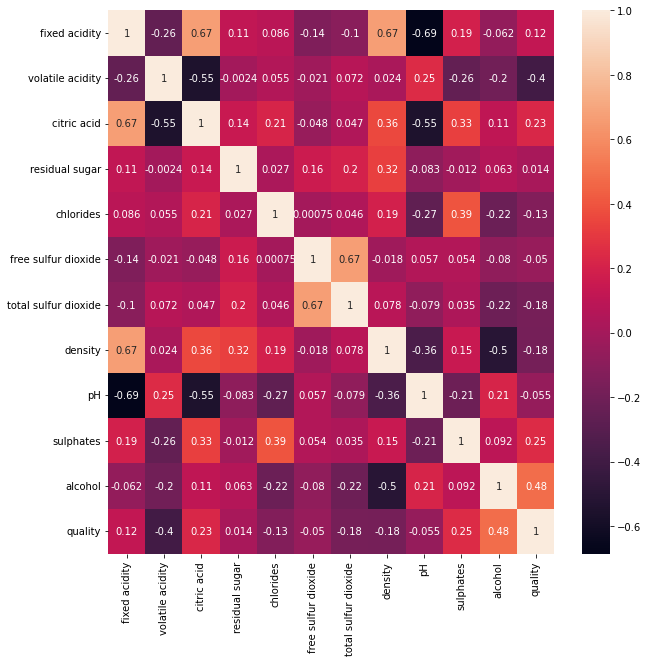

In [14]:
#print("Correlation matrix \n ", corr_matrix)
fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(data = corr_matrix, annot = True)
plt.show()

In [15]:
dwq_norm = df_wine_quality[["volatile acidity","citric acid","sulphates", "alcohol", "quality"]].copy()

In [16]:
df_wine_quality['quality'].min()

3

In [17]:
(dwq_norm).shape

(1359, 5)

In [18]:
dwq_norm.iloc[:,1].max()

1.0

In [19]:
for col in range(dwq_norm.shape[1]): # normalizing the dataset
  for row in range(dwq_norm.shape[0]):
    dwq_norm.iloc[row,col] = (dwq_norm.iloc[row,col]-dwq_norm.iloc[:,col].min())/(dwq_norm.iloc[:,col].max()-dwq_norm.iloc[:,col].min())

In [20]:
dwq_norm

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.397260,0.00,0.137725,0.153846,0.400000
1,0.520548,0.00,0.291190,0.654147,0.605263
2,0.438356,0.04,0.275080,0.654147,0.605263
3,0.109589,0.56,0.237492,0.654147,0.736842
5,0.374325,0.00,0.226752,0.627021,0.605263
...,...,...,...,...,...
1593,0.606912,0.08,0.792856,0.846100,1.000000
1594,0.586223,0.08,0.516663,0.936630,0.823256
1595,0.534501,0.10,0.723808,1.000000,1.000000
1597,0.632773,0.12,0.666268,0.926241,0.823256


## We will select only four features that have high correlation with our target variable quality - volatile acidity (-0.39) , citric acid (0.23 ), sulphates (0.25)and  alcohol (0.48)

In [21]:
features = ["volatile acidity","citric acid","sulphates", "alcohol"]

In [22]:
x_df = dwq_norm[features] #taking X dataframe of features

In [23]:
y_df = dwq_norm['quality'] # taking Y dataframe of target variable

In [24]:
x_train = np.zeros((int(x_df.shape[0]*0.8),x_df.shape[1]+1)) #making x matrix from first 80% of X dataframe

In [25]:
for i in x_train:
  i[0]=1

In [26]:
x_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [27]:
x_train.shape

(1087, 5)

In [28]:
for i in range(x_train.shape[0]):
  for j in range(1,x_train.shape[1]):
    x_train[i][j]=x_df.iloc[i][j-1]

In [29]:
x_train

array([[1.        , 0.39726027, 0.        , 0.13772455, 0.15384615],
       [1.        , 0.52054795, 0.        , 0.29118971, 0.6541471 ],
       [1.        , 0.43835616, 0.04      , 0.27508039, 0.6541471 ],
       ...,
       [1.        , 0.27587932, 0.        , 0.33275488, 0.8215103 ],
       [1.        , 0.35346368, 0.2       , 0.24934924, 0.68020595],
       [1.        , 0.35346368, 0.13      , 0.33275488, 0.8215103 ]])

In [30]:
y_train = np.asarray(list(y_df)[0:int(x_df.shape[0]*0.8)]) # making a list of y values from Y dataframe

In [31]:
y_train.shape

(1087,)

In [32]:
w = np.matmul((np.matmul(np.linalg.inv(np.matmul(x_train.T,x_train)),x_train.T)),y_train) # OLS equation

In [33]:
w

array([ 0.35321107, -0.24115142,  0.00772533,  0.1053253 ,  0.51454218])

In [34]:
x_test = np.zeros((x_df.shape[0]-int(x_df.shape[0]*0.8),x_df.shape[1]+1)) # making x matrix from last 20% of X dataframe

In [35]:
for i in x_test:
  i[0]=1

In [36]:
for i in range(x_test.shape[0]):
  for j in range(1,x_test.shape[1]):
    x_test[i][j]=x_df.iloc[i+int(x_df.shape[0]*0.8)][j-1]

In [37]:
y_test = np.asarray(list(y_df)[int(x_df.shape[0]*0.8):int(x_df.shape[0])]) # y values from last 20% of Y dataframe

In [38]:
y_test.shape

(272,)

In [39]:
rmse_train = np.sqrt((np.sum((y_train-np.dot(x_train,w))**2))/x_train.shape[0]) #rmse of x matrix

In [40]:
rmse_train 

0.08760503750504202

In [41]:
loss_train = np.sum((y_train-np.dot(x_train,w))**2) #loss on training dataset

In [42]:
loss_train

8.342336502134422

In [43]:
loss_test = np.sum((y_test-np.dot(x_test,w))**2) #loss on testing dataset

In [44]:
loss_test

3.0064697095032824

In [45]:
rmse_test = np.sqrt((np.sum((y_test-np.dot(x_test,w))**2))/x_test.shape[0]) #rmse of test dataset

In [46]:
rmse_test

0.10513418788105573

In [47]:
y_test_pred = np.dot(x_test,w)

Text(0.5, 1.0, 'Test vs Prediction')

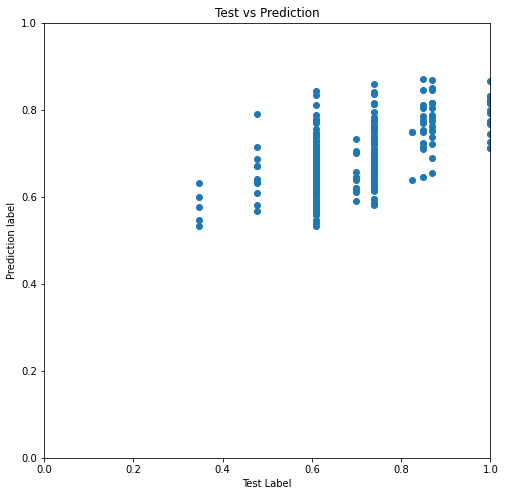

In [48]:
fig = plt.figure(figsize=(8,8)) #plotting test data vs test prediction
plt.scatter(y_test,y_test_pred)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("Test Label")
plt.ylabel("Prediction label")
plt.title("Test vs Prediction")

In [91]:
y_train_pred = np.dot(x_train,w)

Text(0.5, 1.0, 'Train vs Prediction')

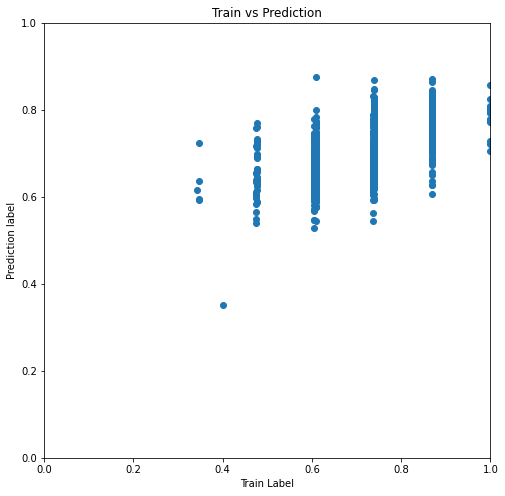

In [92]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_train,y_train_pred)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("Train Label")
plt.ylabel("Prediction label")
plt.title("Train vs Prediction")